<a href="https://colab.research.google.com/github/I-m-Sp/Disaster_SOS_message_management/blob/main/Disaster_SOS_message_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LOADING DATA MODULES**

In [52]:
!pip install wordcloud

In [53]:
!pip install pyspellchecker

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import spacy
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## **LOADING DATA**

In [55]:
# File ID from the shareable link
file_id = '1hqwujfrg-4UJ5FM4BTLHNoNfp1w8-AR3'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hqwujfrg-4UJ5FM4BTLHNoNfp1w8-AR3
To: /content/dataset.csv
100%|██████████| 5.06M/5.06M [00:00<00:00, 69.0MB/s]


'dataset.csv'

In [56]:
# df=pd.read_csv(csv_file)
df = pd.read_csv(output)

In [57]:
df.head(5)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [58]:
file_id = '1WbmTKnLMaF0xeijVXdjYbwXklVhxOG29'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset_out.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1WbmTKnLMaF0xeijVXdjYbwXklVhxOG29
To: /content/dataset_out.csv
100%|██████████| 11.9M/11.9M [00:00<00:00, 69.8MB/s]


'dataset_out.csv'

In [59]:
df_out = pd.read_csv(output)

In [60]:
df_out.head(5)

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


## **DATA CLEANING & REFINING AND PERFORMING EDA**

In [61]:
j=0
lst=[]
for i in range(len(df_out['categories'][0])):
  if df_out['categories'][0][i]==';':
    lst.append(df_out['categories'][0][j:i-2])
    j=i+1
  elif i==len(df_out['categories'][0])-1:
    lst.append(df_out['categories'][0][j:i-1])

In [62]:
for col in lst:
    df_out[col] = [0] * df_out.shape[0]

In [63]:
df_out.head(5)

,id,categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,related-1;request-0;offer-0;aid_related-1;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,related-1;request-1;offer-0;aid_related-1;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
def check_numbers(strng):
  count=[]
  j=0
  for i in range(len(strng)):
    if strng[i]=='1':
      count.append(lst.index(strng[j:i-1]))
    elif strng[i]==';':
      j=i+1
  return count
def update_df(strng, index):
  n=check_numbers(strng)
  for i in n:
    df_out.at[index, df_out.columns[i + 2]]=1

In [65]:
df_out.index

RangeIndex(start=0, stop=26248, step=1)

In [66]:
# df_out['categories'].apply(check_numbers, axis=1)
for index in df_out.index:
    df_out.at[index, 'categories'] = update_df(df_out.at[index, 'categories'],index)

In [67]:
df_out.head(5)

,id,categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,None,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,None,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df['locations']=np.nan

In [69]:
df.head(5)

,id,message,original,genre,locations
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,NaN
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,NaN


In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_locations(text):
    doc = nlp(text)
    locations= [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    return locations if locations else None

# Apply function to each row in the 'messages' column
for index in df.index:
  if extract_locations(df.at[index, 'message'])!=None:
    df.at[index,'locations'] = str(extract_locations(df.at[index, 'message']))

In [71]:
df.head(5)

,id,message,original,genre,locations
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']"
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti']


In [72]:
df['message'].isnull().sum()

0

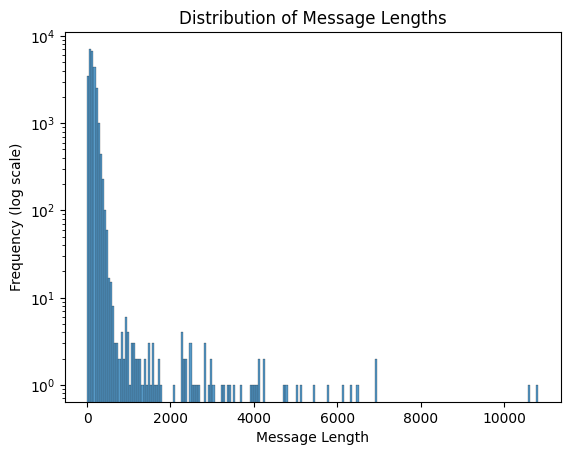

In [73]:
#Length of messages
df['message_length'] = df['message'].apply(len)

sns.histplot(df['message_length'], binwidth=50)
plt.yscale('log')
plt.xlabel('Message Length')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Message Lengths')
plt.show()

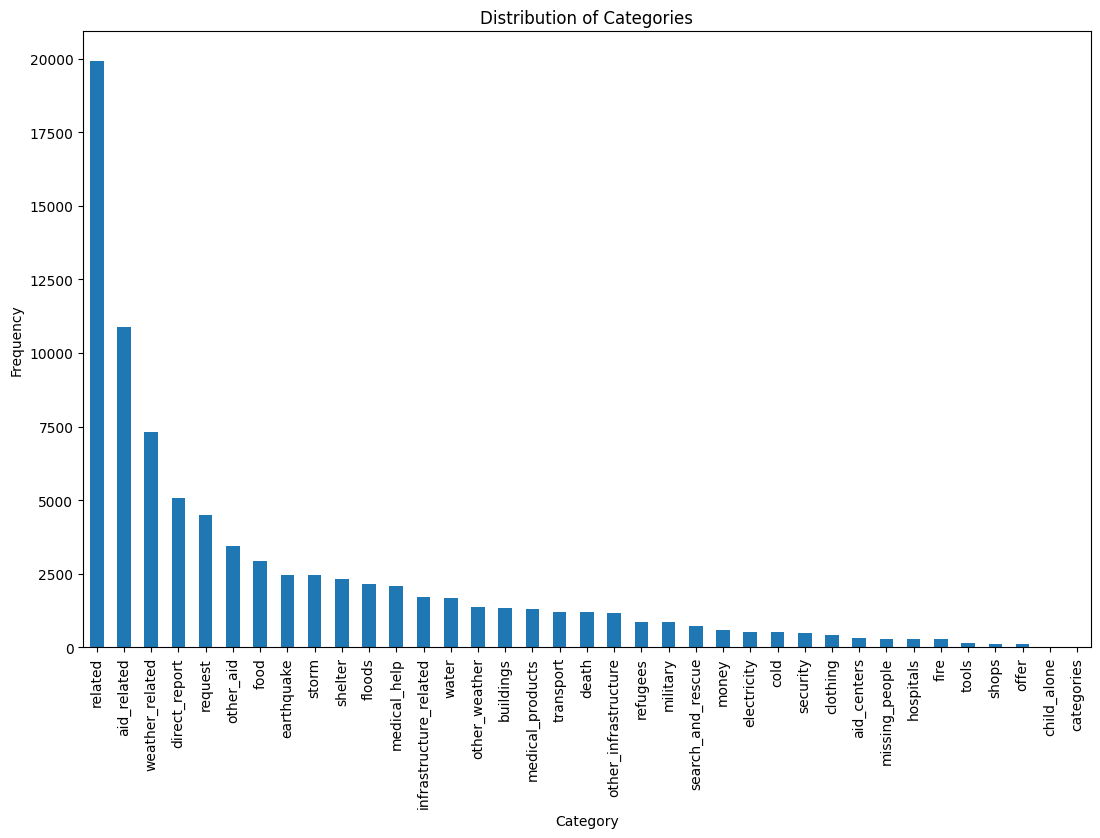

In [74]:
categories = df_out.columns[-37:]
category_counts = df_out[categories].sum().sort_values(ascending=False)
plt.figure(figsize=(13, 8))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

In [75]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


In [76]:
nltk.download('stopwords')
nltk.download('punkt')

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

# Example usage:
for index in df.index:
  text = df.at[index, 'message']
  df.at[index, 'message'] = remove_stopwords(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
spell = SpellChecker()

def correct_spelling(text):
    # Split the text into words
    words = text.split()
    # Correct spelling for each word
    corrected_words = [spell.candidates(word).pop() if word in spell else word for word in words]
    # Join the corrected words back into a single string
    return ' '.join(corrected_words)

# Apply the correction function to each message in the DataFrame
df['message'] = df['message'].apply(correct_spelling)

In [78]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,Weather update - cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,Hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,UN reports Leogane 80-90 destroyed . Hospital ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,"says : west side Haiti , rest country today to...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


In [79]:
# Function to clean the text
def clean_text(text):
    # Remove unwanted characters (e.g., punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove short words (length < 2)
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text

# Apply cleaning function
df['message'] = df['message'].apply(clean_text)

In [80]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,Hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,UN reports Leogane 8090 destroyed Hospital St ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


<ipython-input-81-ea64de5857a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis')


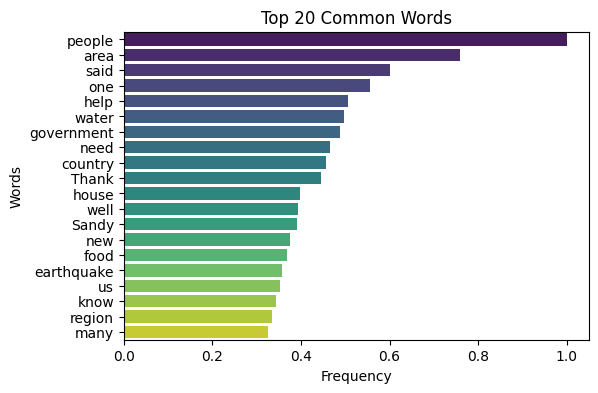

In [81]:
all_messages = ' '.join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
word_freq = wordcloud.words_

df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort DataFrame by frequency
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Common Words')
plt.show()


In [82]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,Hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,UN reports Leogane 8090 destroyed Hospital St ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


In [83]:
result = pd.merge(df, df_out, on='id', how='left')

In [84]:
result.head(5)

,id,message,original,genre,locations,message_length,categories,related,request,offer,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39,None,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 8090 destroyed Hospital St ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100,None,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
lst

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


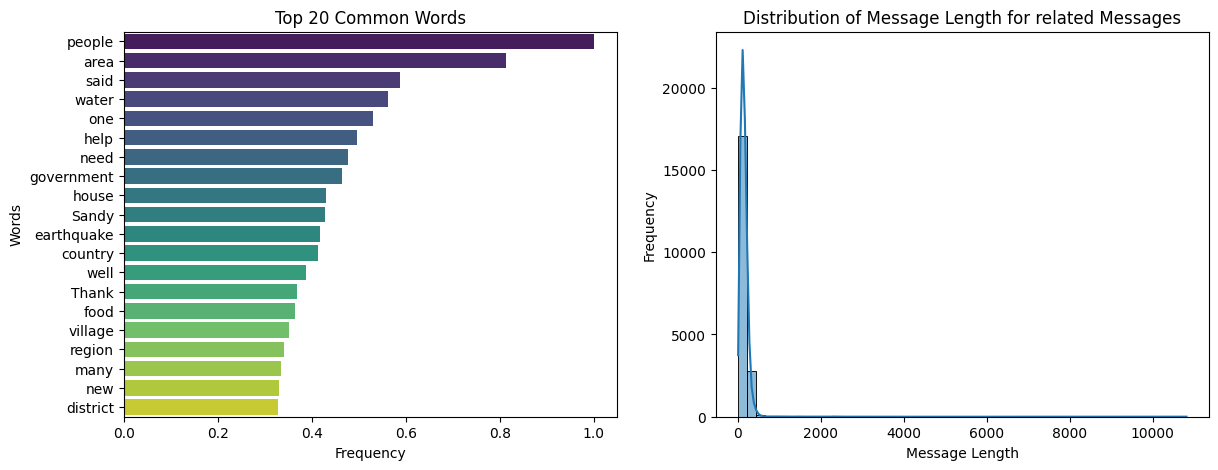

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


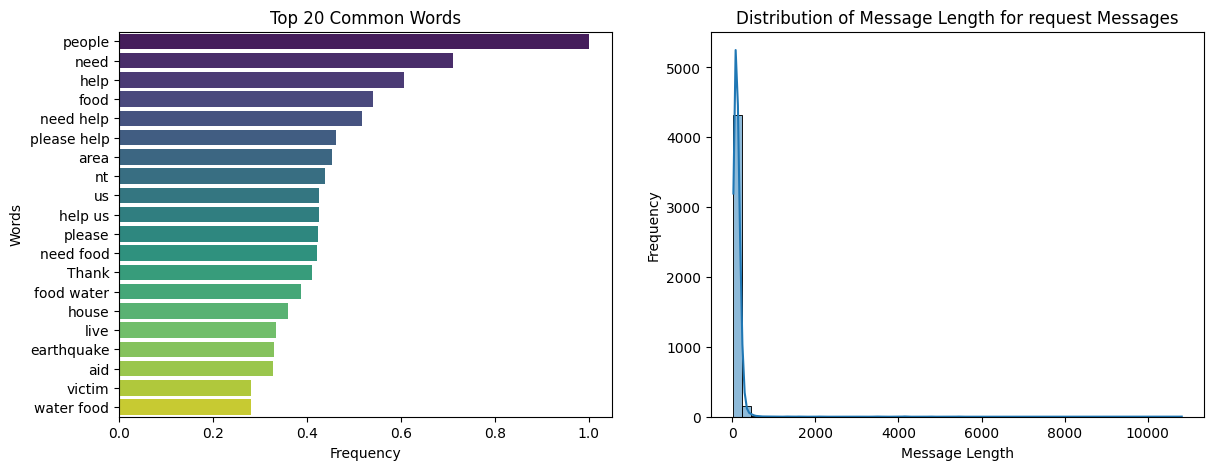

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


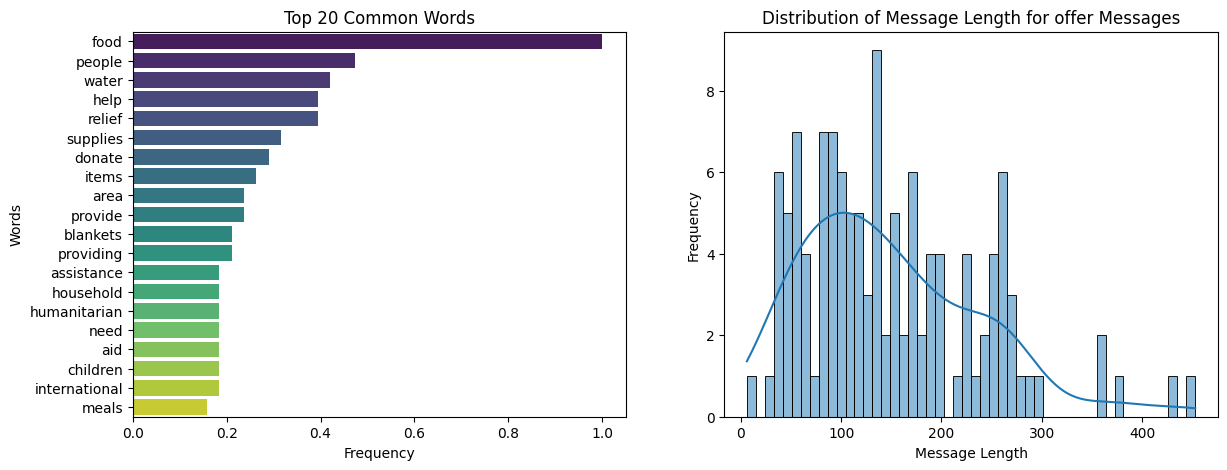

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


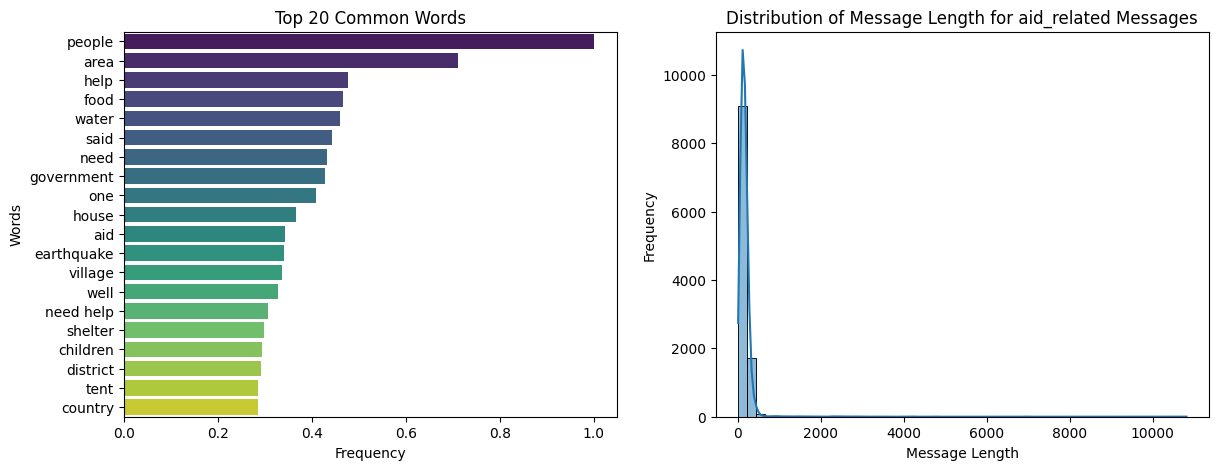

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


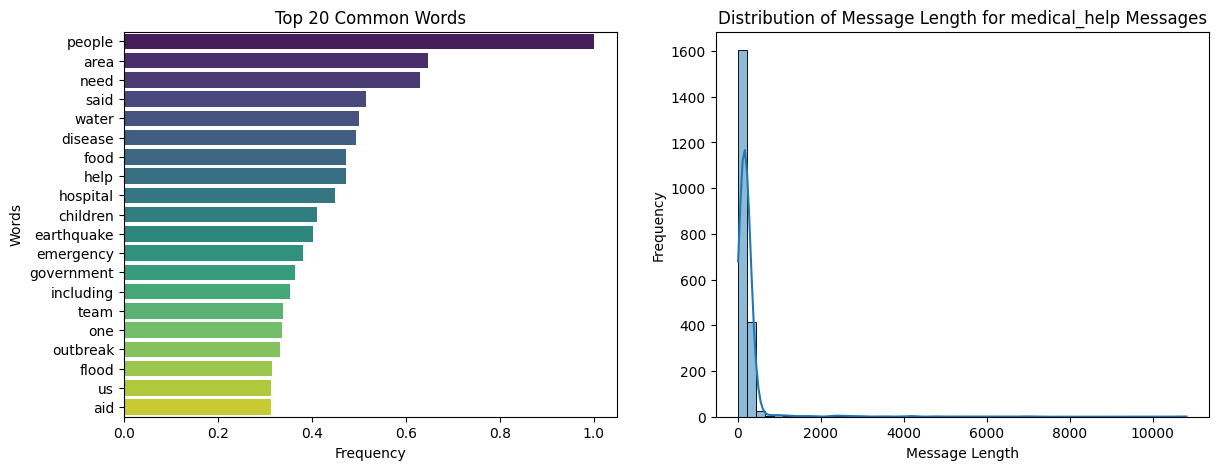

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


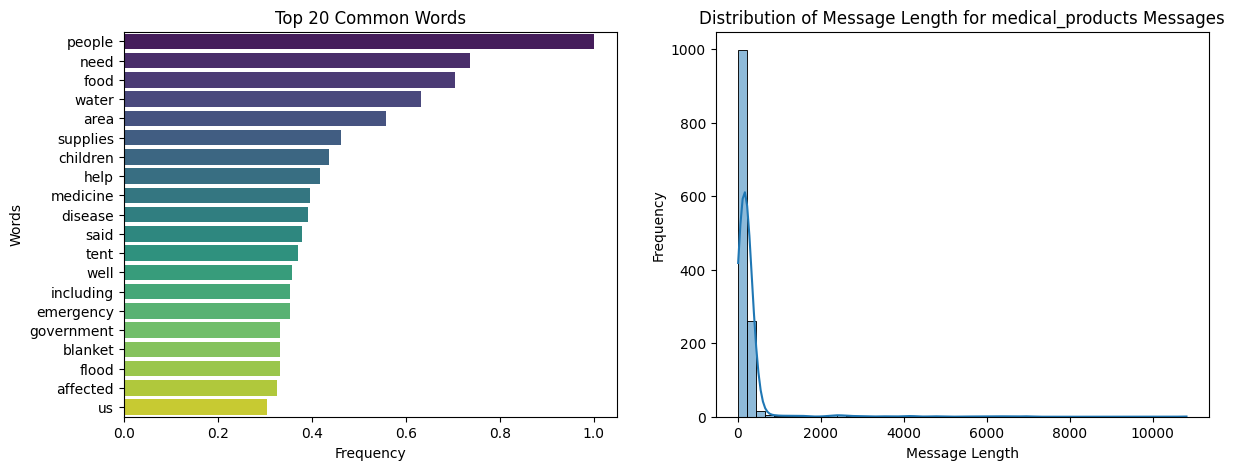

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


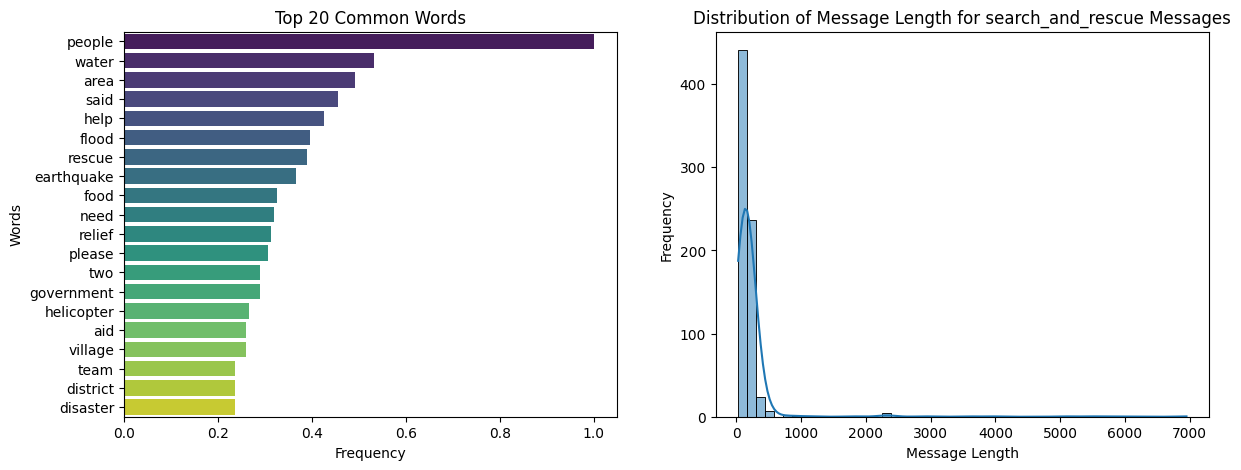

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


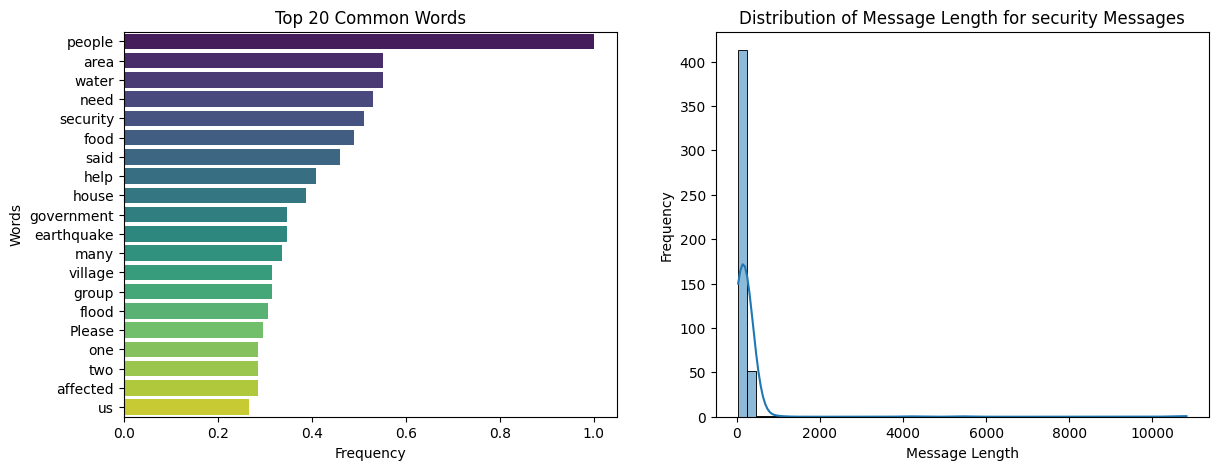

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


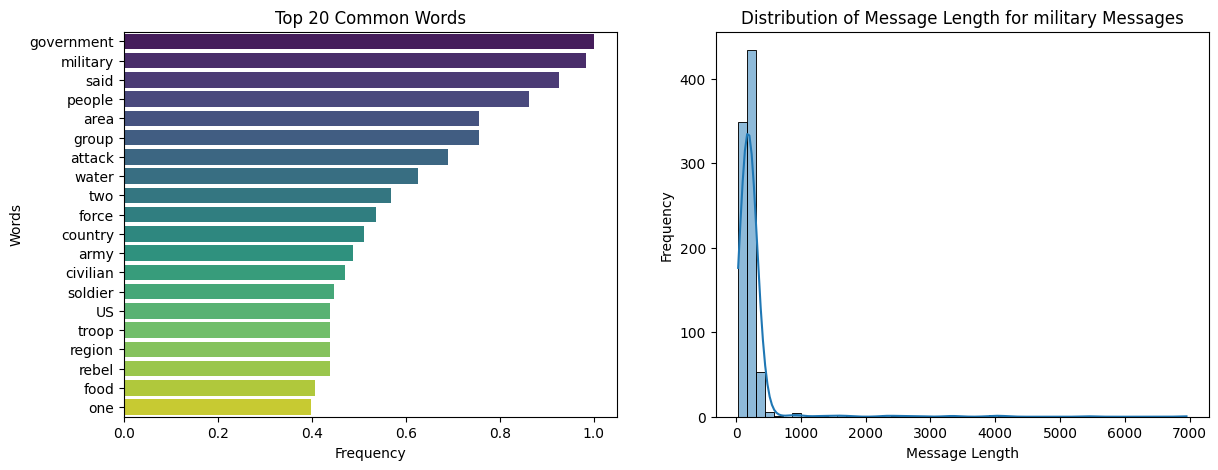


 
 
 
 There were no cases for child_alone 
 
 
 



<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


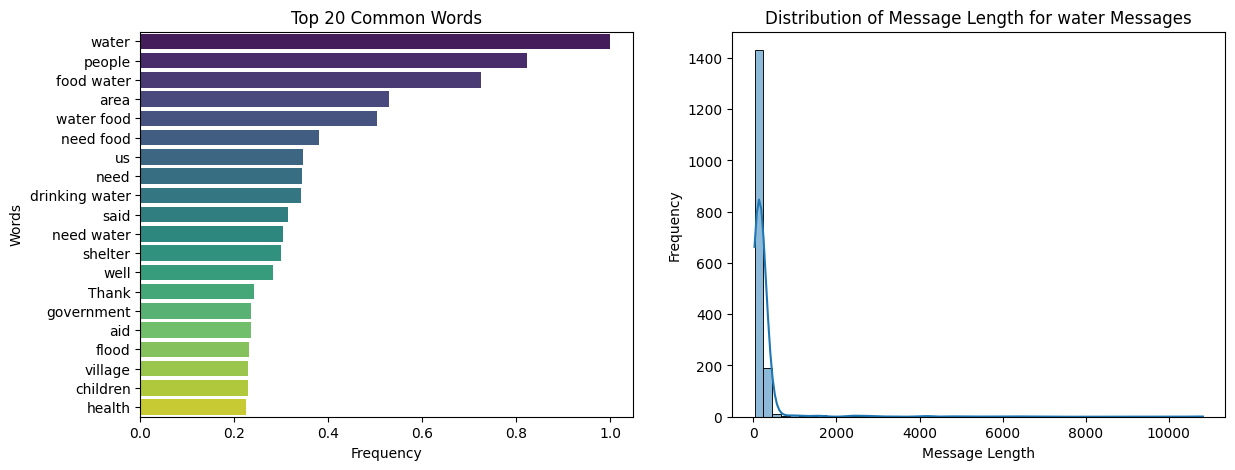

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


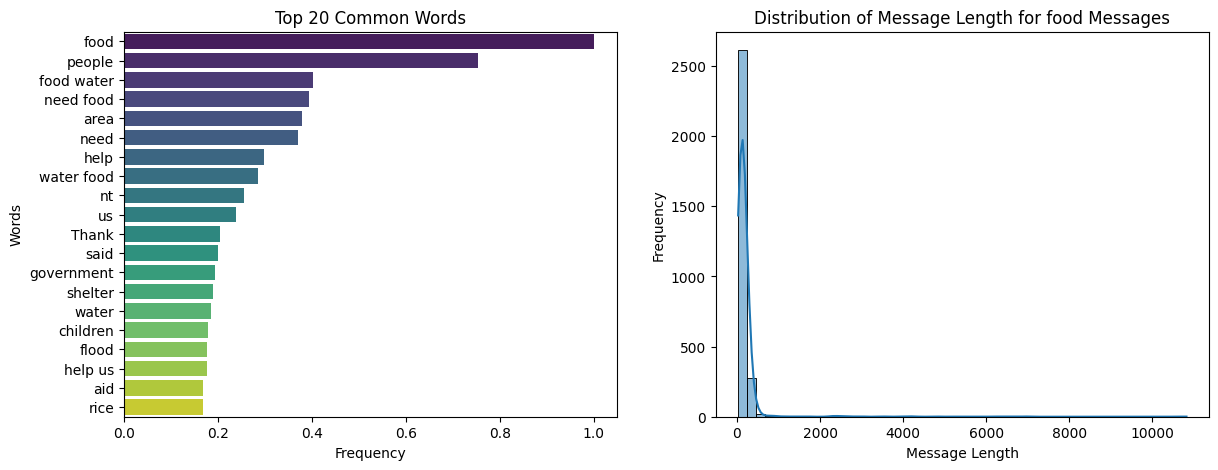

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


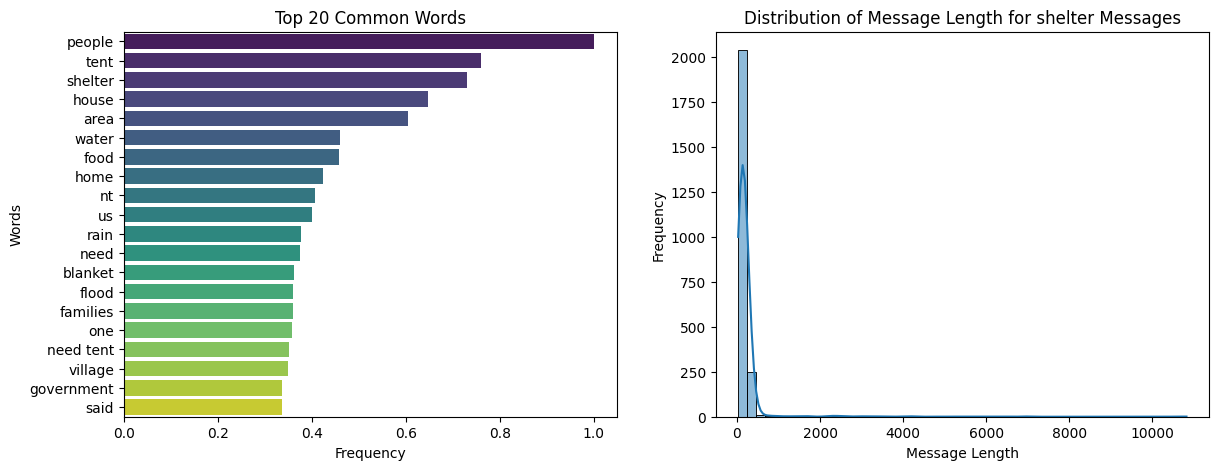

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


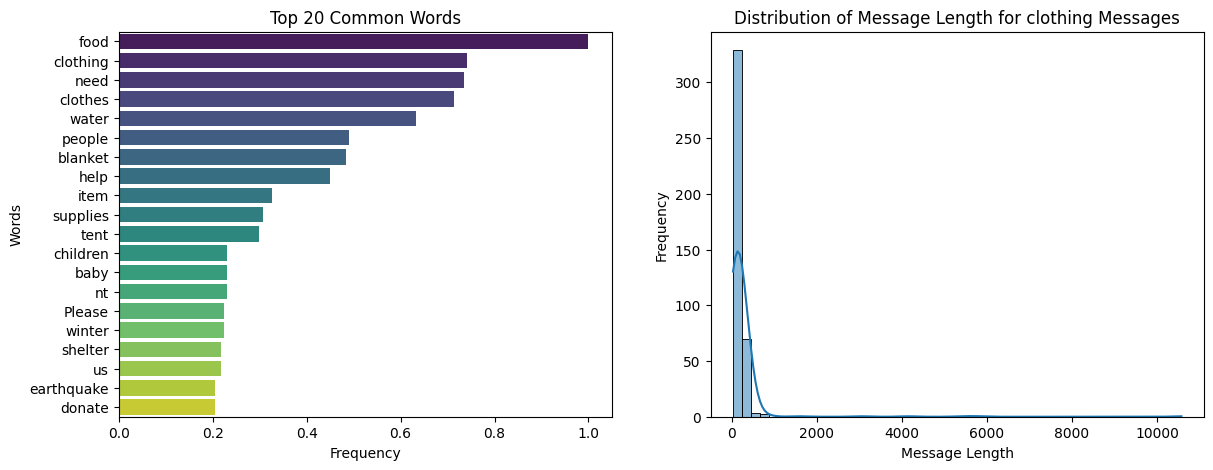

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


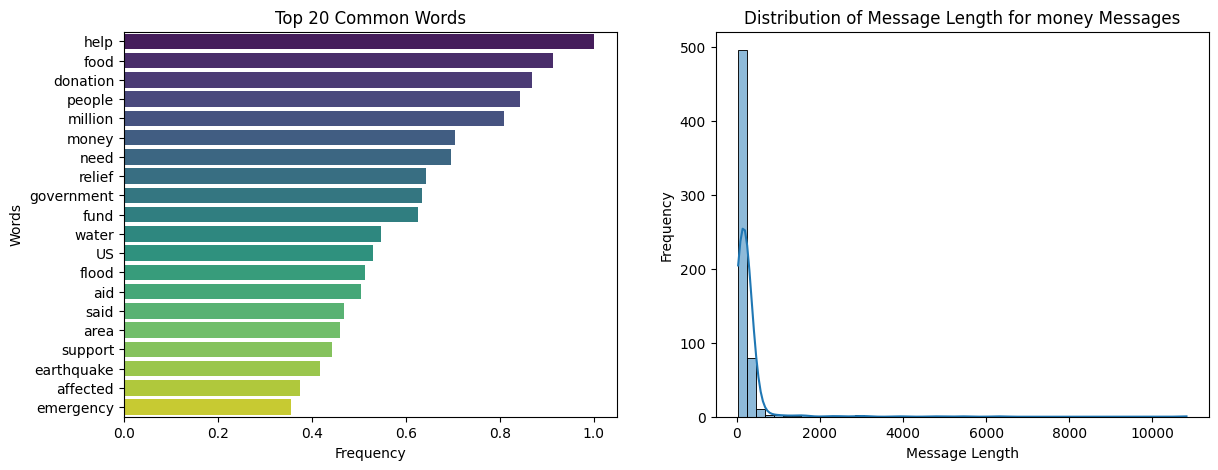

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


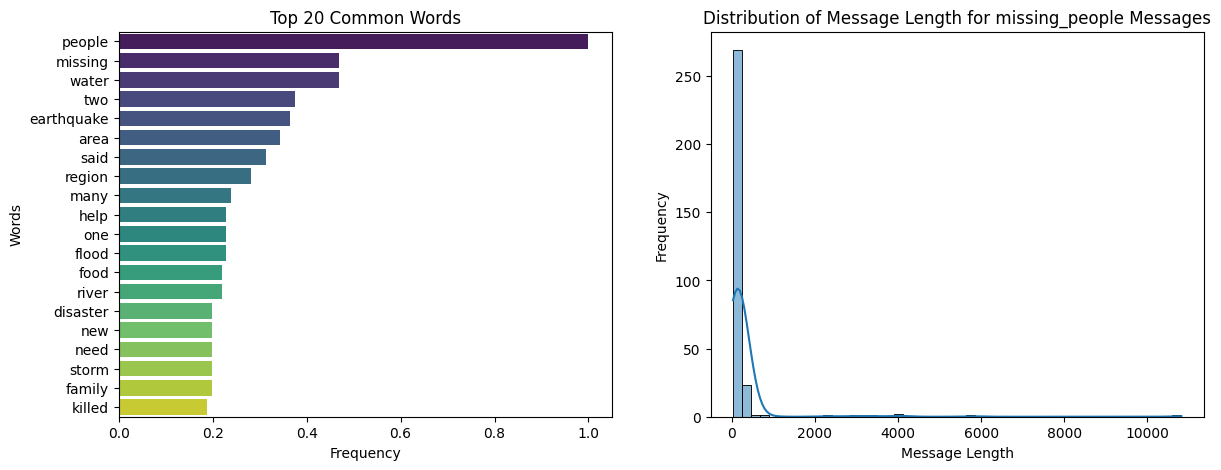

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


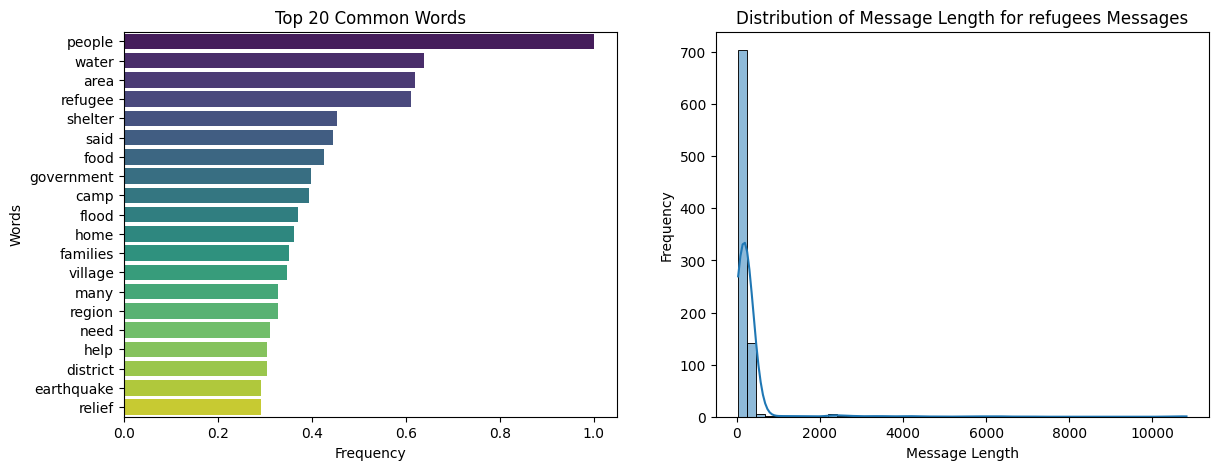

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


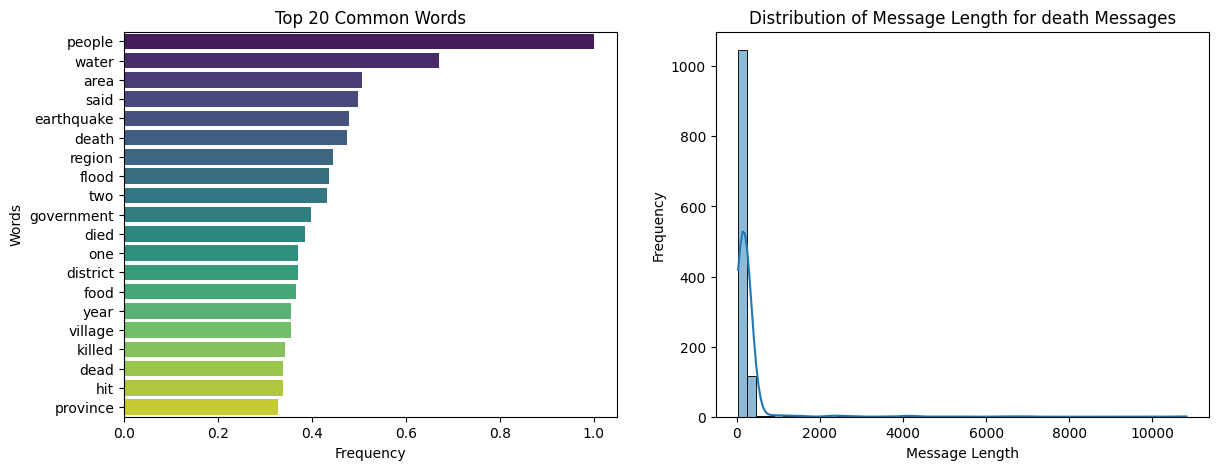

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


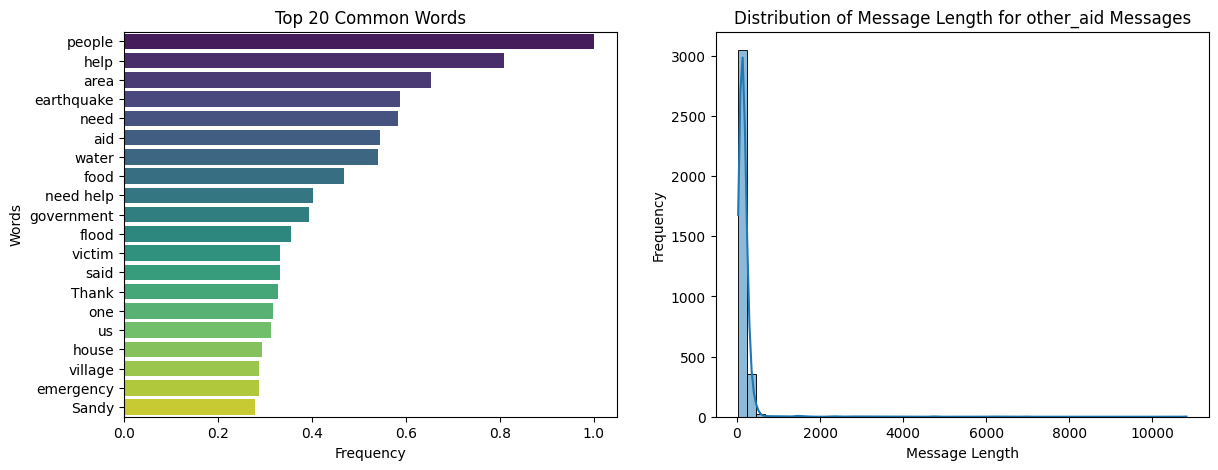

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


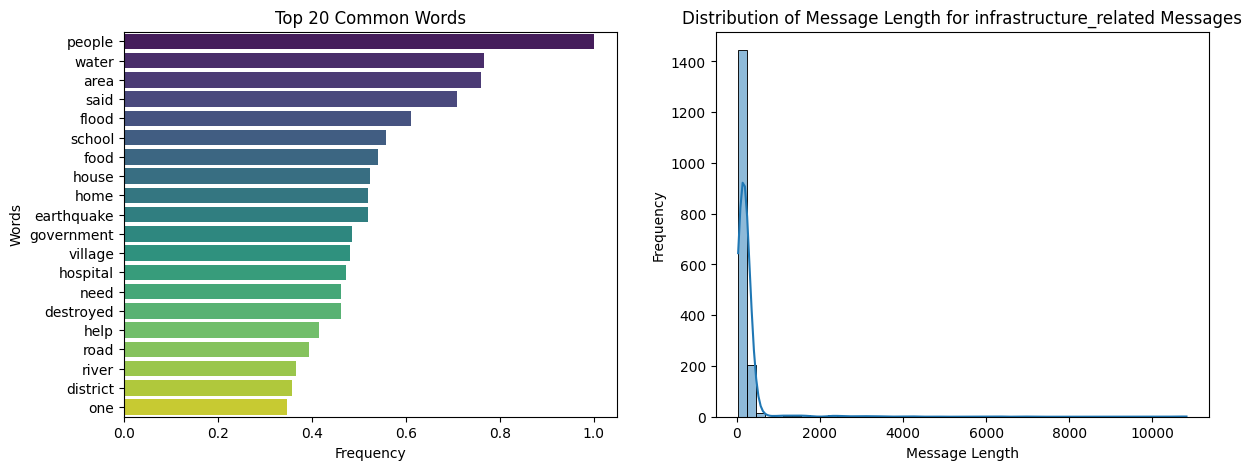

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


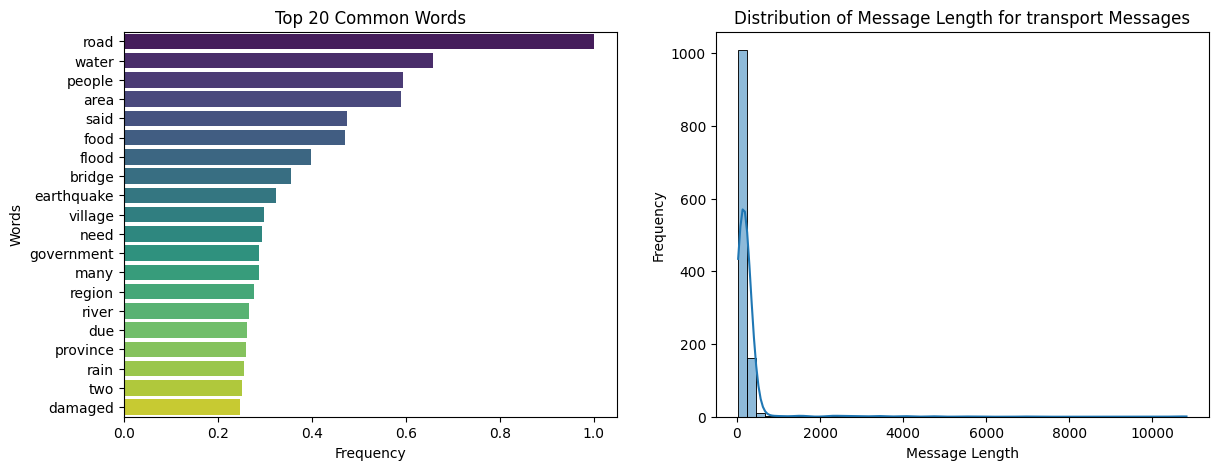

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


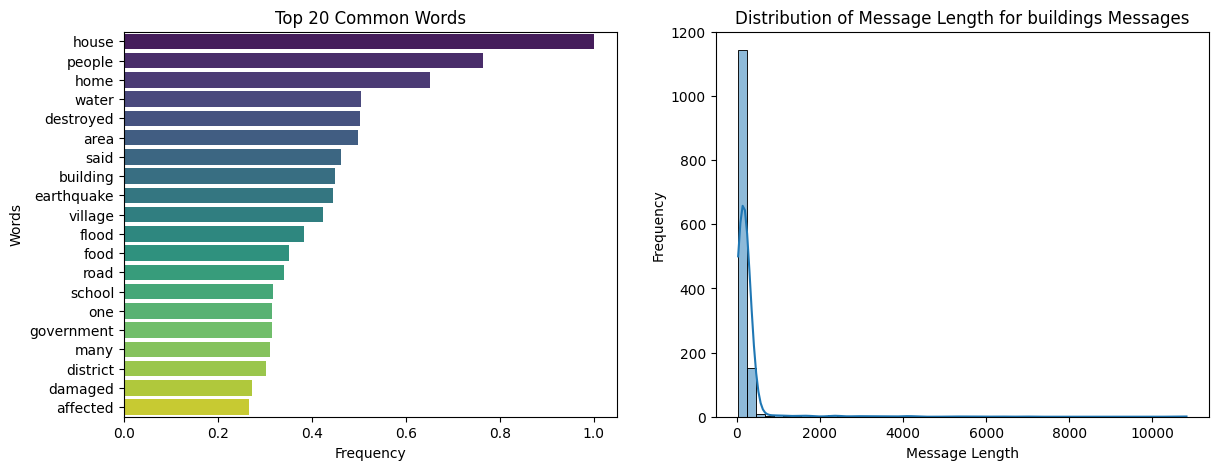

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


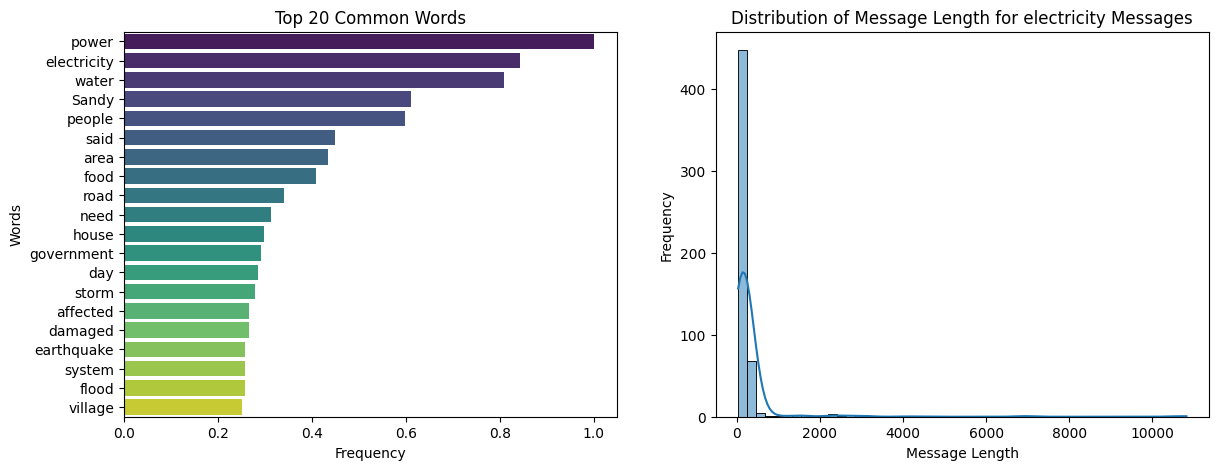

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


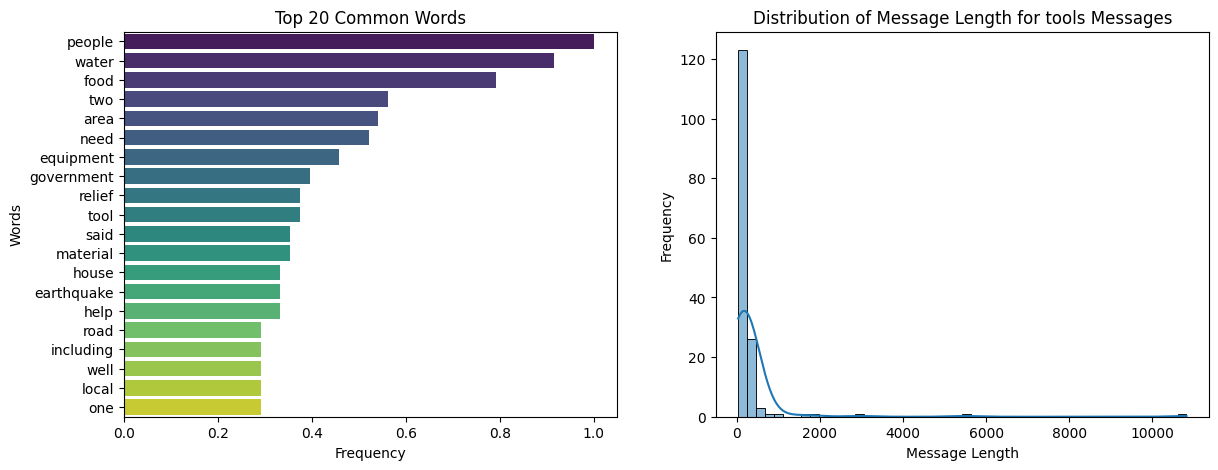

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


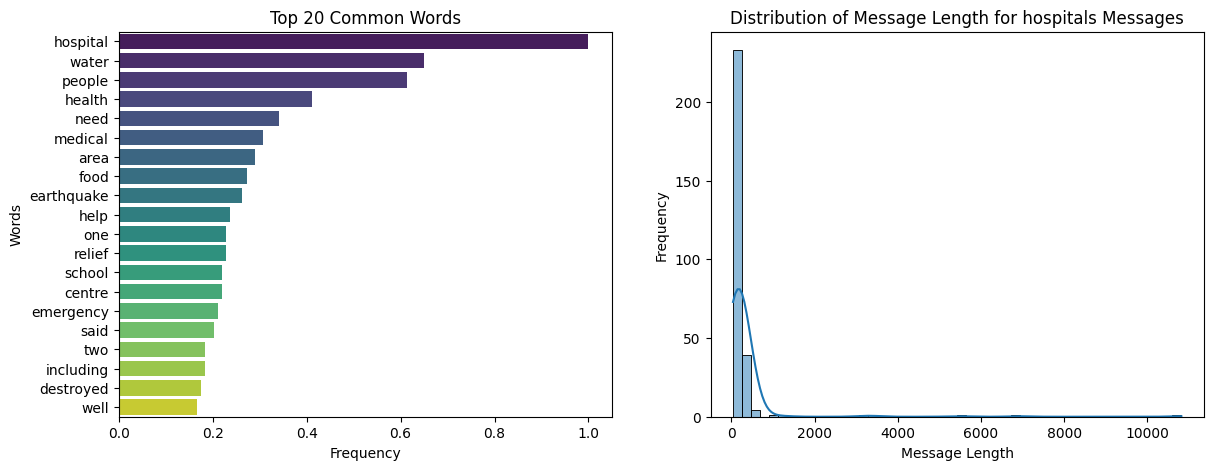

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


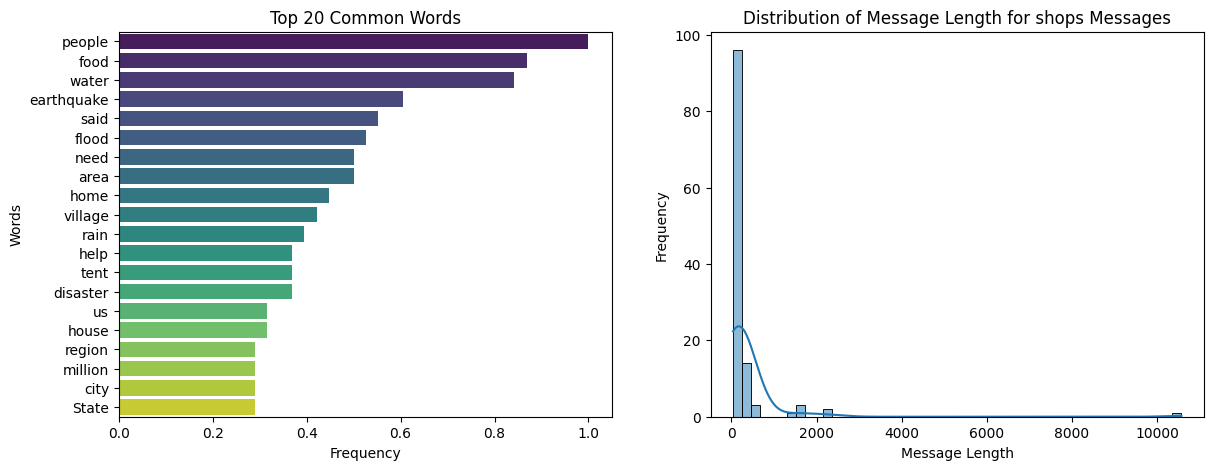

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


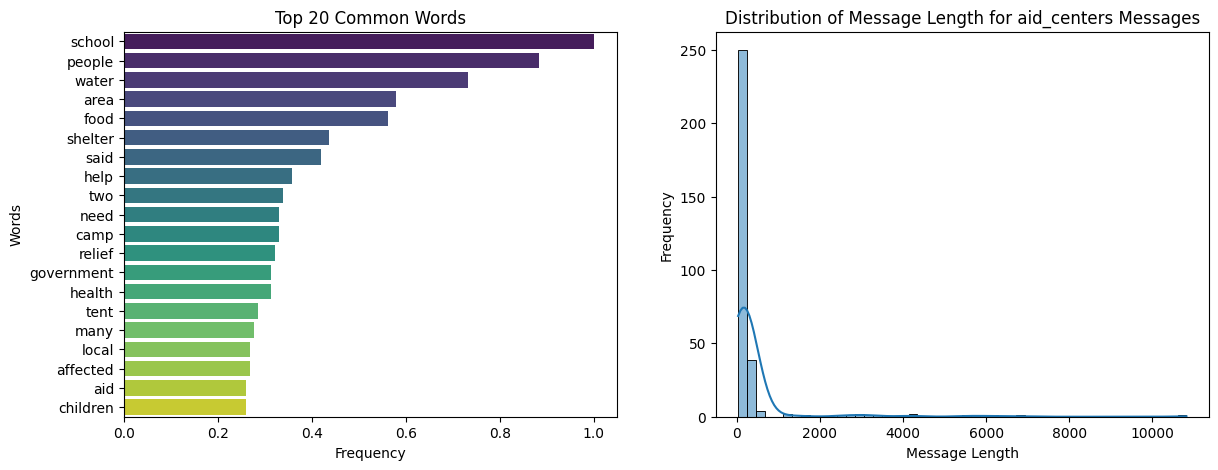

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


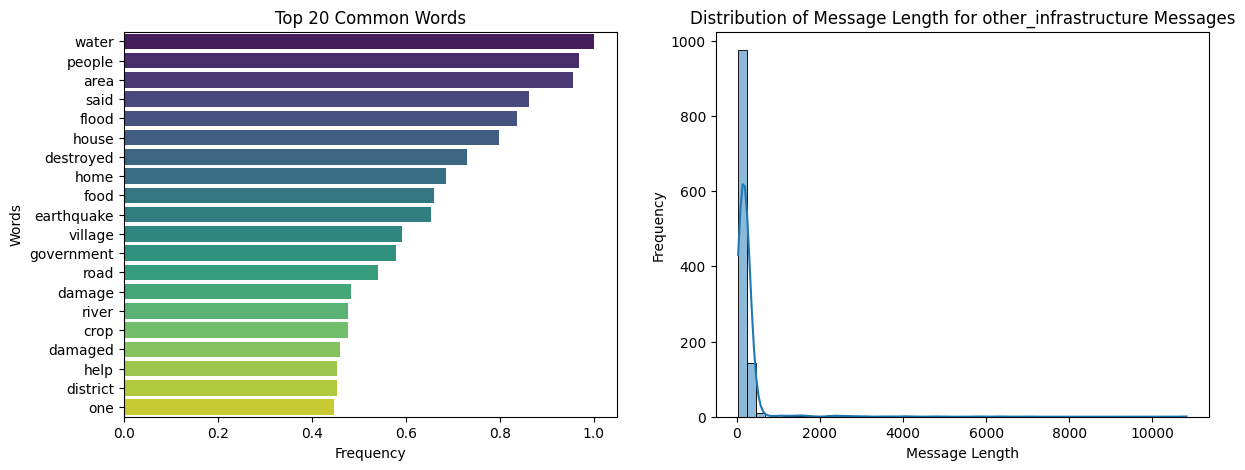

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


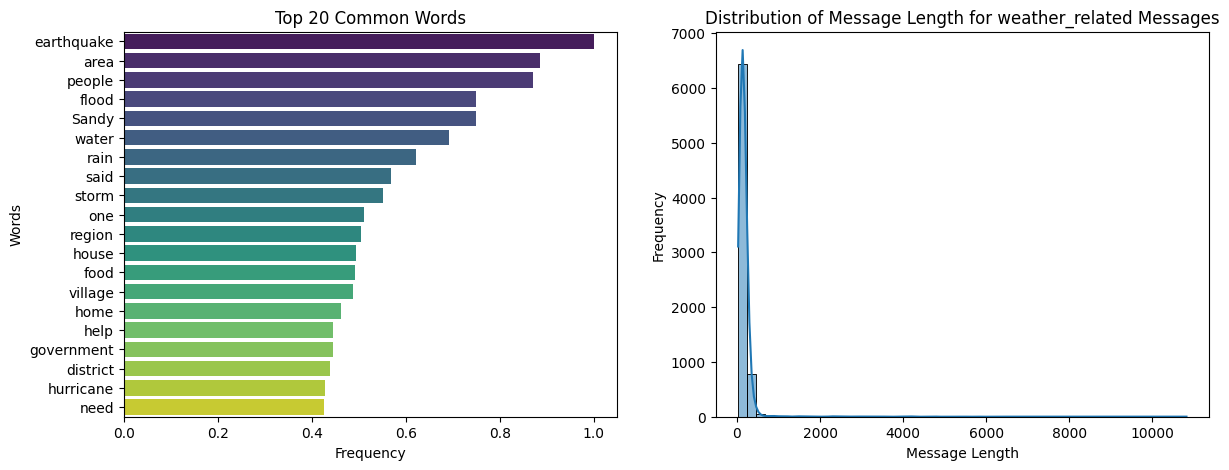

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


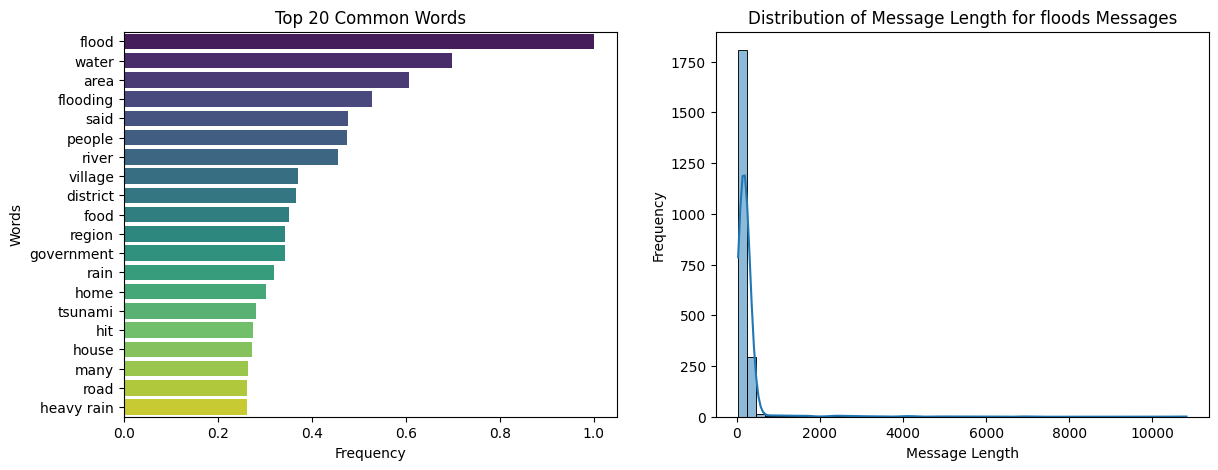

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


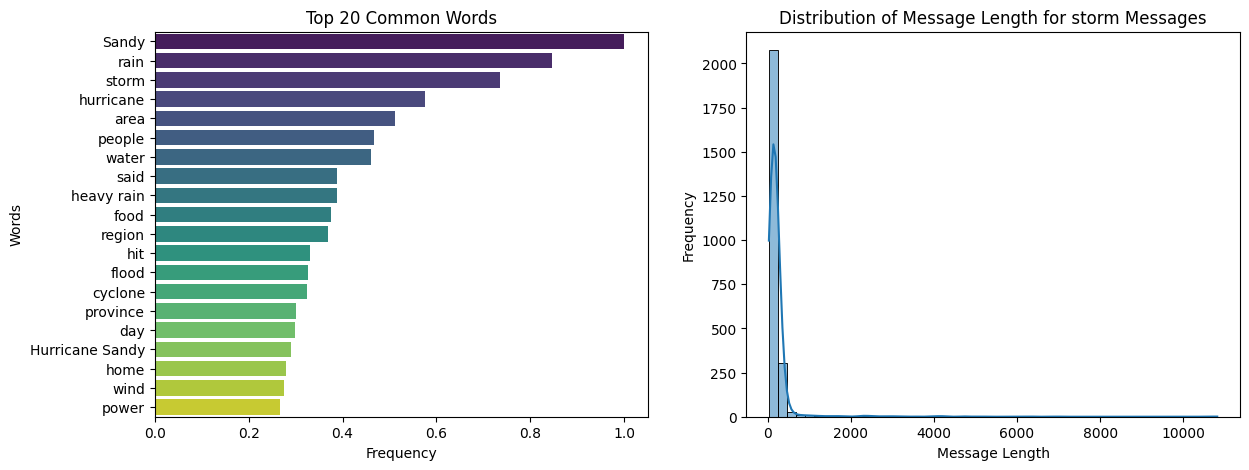

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


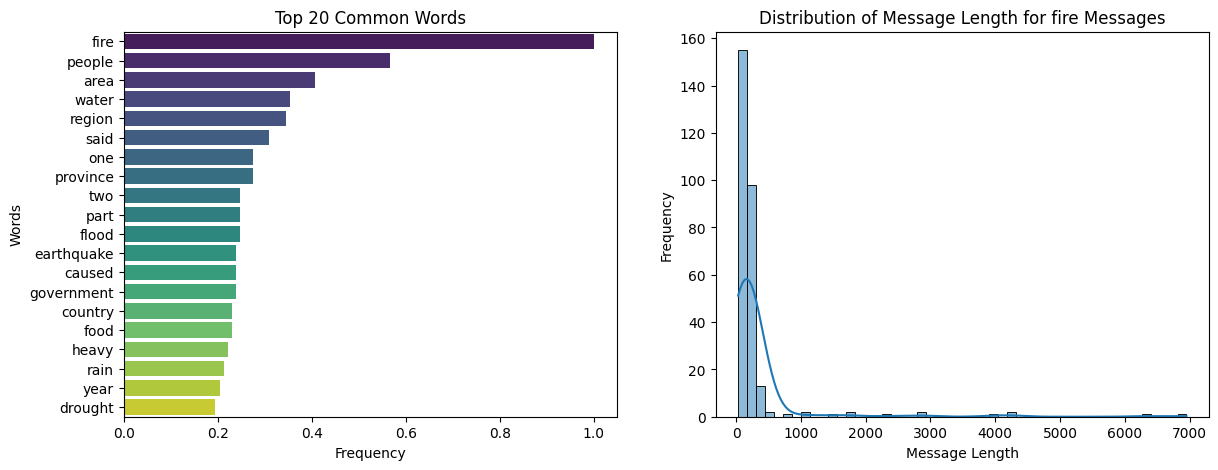

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


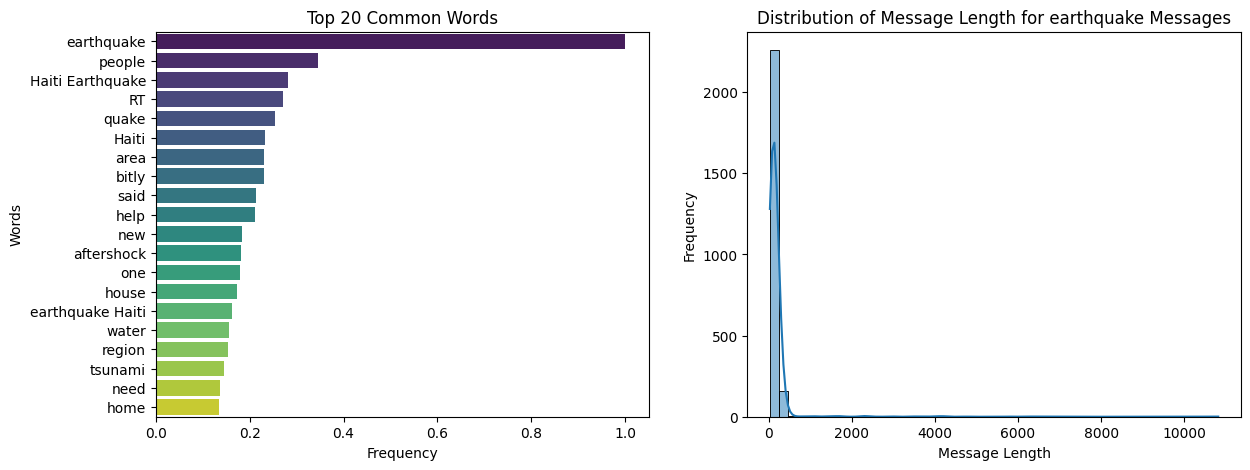

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


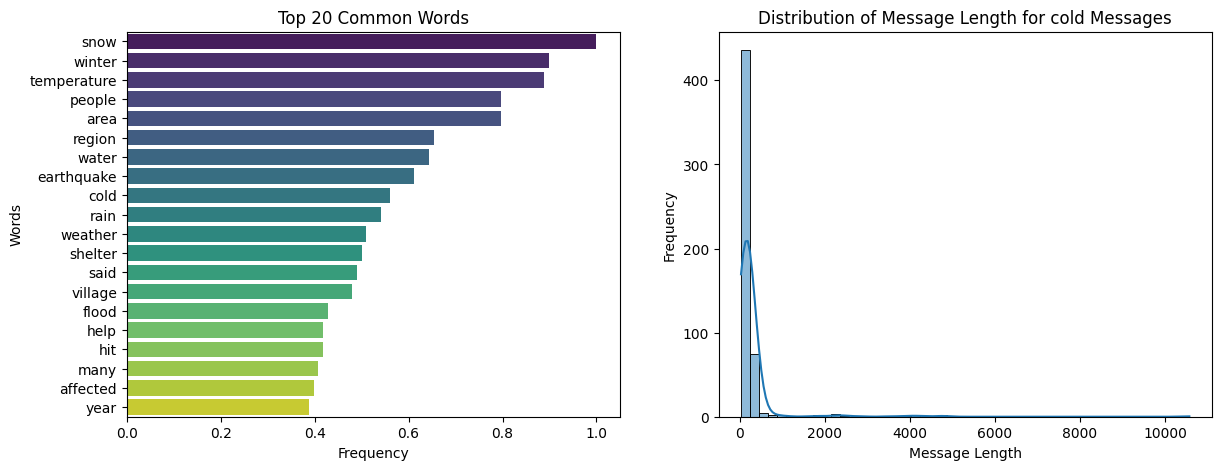

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


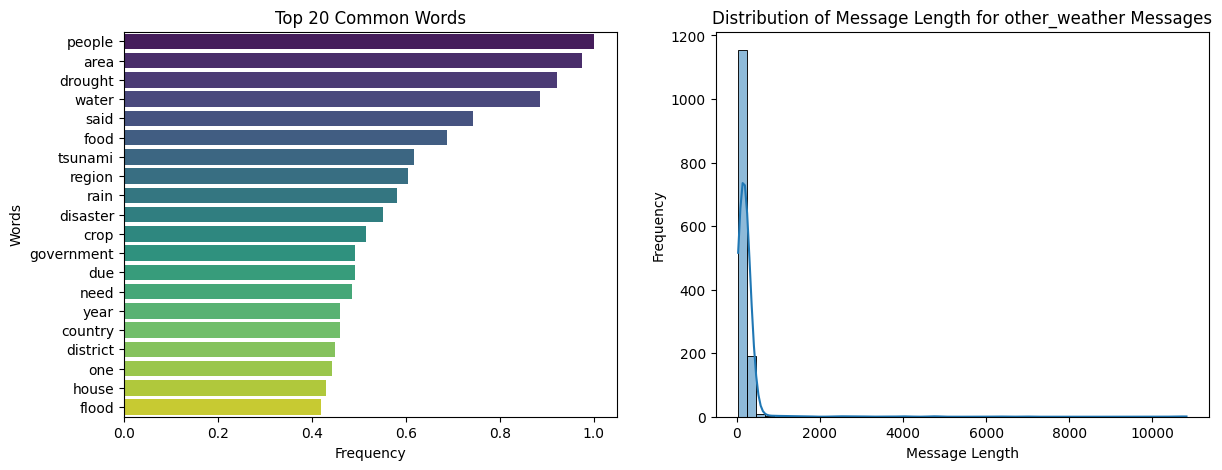

<ipython-input-86-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


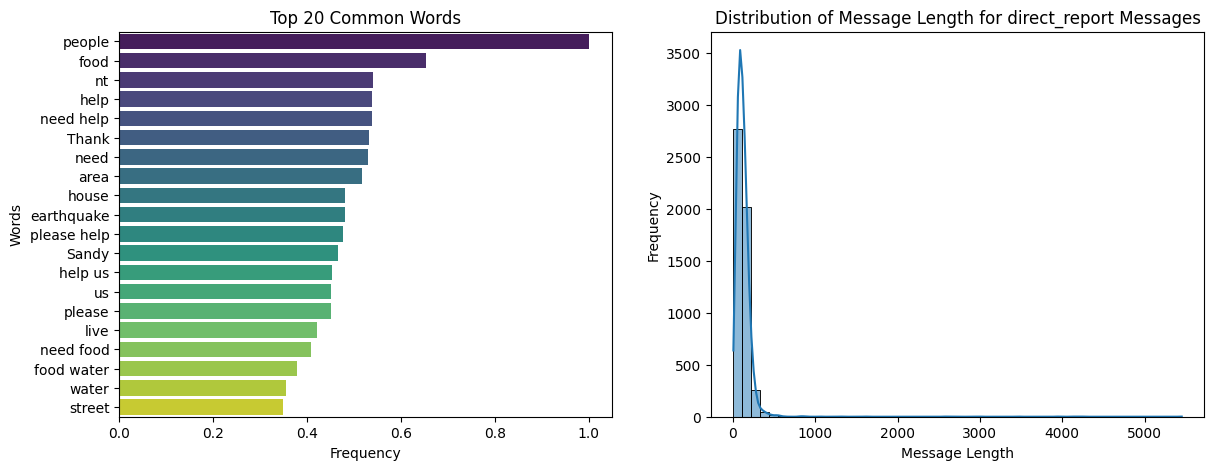

In [86]:
for element in lst:
  element_df = result[result[element]==1]

  # Word cloud for 'type of request' messages
  element_messages = ' '.join(element_df['message'])
  try:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(element_messages)
    word_freq = wordcloud.words_
  except:
    print(f"\n \n \n \n There were no cases for {element} \n \n \n \n")
    continue

  # all_messages = ' '.join(df['message'])

  df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

  # Sort DataFrame by frequency
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])
  axs[0].set_xlabel('Frequency')
  axs[0].set_ylabel('Words')
  axs[0].set_title('Top 20 Common Words')


  # Message length distribution for 'medical request' category
  sns.histplot(element_df['message_length'], bins=50, kde=True, ax=axs[1])
  axs[1].set_title(f'Distribution of Message Length for {element} Messages')
  axs[1].set_xlabel('Message Length')
  axs[1].set_ylabel('Frequency')

  plt.show()

In [87]:
result.head(5)

,id,message,original,genre,locations,message_length,categories,related,request,offer,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39,None,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 8090 destroyed Hospital St ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100,None,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
result.drop(columns="categories", inplace=True)

In [89]:
result[(result.iloc[:,-37:]).isnull().any(axis=1)].count()

id                        0
message                   0
original                  0
genre                     0
locations                 0
message_length            0
related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods              

In [90]:
result.iloc[:,-36:].columns

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')


## **MODEL TRAINING**

In [91]:
x=result.iloc[:,1]
y=result.iloc[:,-36:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [93]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=75, random_state=42))
model.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=75,
                                                       random_state=42))

In [94]:
y_pred = model.predict(X_test_tfidf)

# Generate classification report for each category
for i, column in enumerate(y.columns):
    print(f"Category: {column}")
    print(classification_report(y_test[column], y_pred[:, i]))

Category: related
              precision    recall  f1-score   support

           0       0.64      0.51      0.57      1257
           1       0.86      0.91      0.88      4021

    accuracy                           0.81      5278
   macro avg       0.75      0.71      0.72      5278
weighted avg       0.80      0.81      0.81      5278

Category: request
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4353
           1       0.77      0.52      0.62       925

    accuracy                           0.89      5278
   macro avg       0.84      0.74      0.78      5278
weighted avg       0.88      0.89      0.88      5278

Category: offer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5255
           1       1.00      0.04      0.08        23

    accuracy                           1.00      5278
   macro avg       1.00      0.52      0.54      5278
weighted avg       1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif